In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Load and preprocess the dataset
data = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/17/forestfires.csv')

In [3]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = data[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]
y = data['size_category']

In [7]:
# Perform one-hot encoding for categorical features
X = pd.get_dummies(X, columns=['month', 'day'])

# Split the dataset into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model

In [10]:
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

# Validate the model

In [11]:
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7307692307692307
              precision    recall  f1-score   support

       large       0.50      0.07      0.12        28
       small       0.74      0.97      0.84        76

    accuracy                           0.73       104
   macro avg       0.62      0.52      0.48       104
weighted avg       0.68      0.73      0.65       104

[[ 2 26]
 [ 2 74]]


#####  SVM model achieved an accuracy of approximately 73%
##### The precision, recall, and F1-score for the 'large' class are quite low, indicating that the model struggles to correctly classify instances of the 'large' class.

# Grid Search with cross-validation to fine-tune the SVM 

In [13]:
#Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],    # Kernel type
    'degree': [2, 3, 4]                     # Degree of the polynomial kernel (if using 'poly' kernel)
}

In [14]:
#Perform Grid Search with cross-validation
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [15]:
#Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_scaled, y_train)

SVC(C=0.1, degree=2, kernel='linear')

In [16]:
#Evaluate the model with the best hyperparameters on the test set
y_pred = best_svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy with Best Parameters: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Accuracy with Best Parameters: 0.7307692307692307
              precision    recall  f1-score   support

       large       0.50      0.07      0.12        28
       small       0.74      0.97      0.84        76

    accuracy                           0.73       104
   macro avg       0.62      0.52      0.48       104
weighted avg       0.68      0.73      0.65       104

[[ 2 26]
 [ 2 74]]


##### It seems that the hyperparameters 'C': 0.1, 'degree': 2, and 'kernel': 'linear' are the best combination based on the search. 

# To improve accuracy
##### Non-Linear Kernels


In [17]:
#Define the SVM model with non-linear kernel 'rbf'
svm_model = SVC(kernel='rbf', C=1)

In [18]:
#Fit the model and make predictions
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

In [19]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7403846153846154
              precision    recall  f1-score   support

       large       0.67      0.07      0.13        28
       small       0.74      0.99      0.85        76

    accuracy                           0.74       104
   macro avg       0.70      0.53      0.49       104
weighted avg       0.72      0.74      0.65       104

[[ 2 26]
 [ 1 75]]


##### The accuracy of the SVM model has improved to approximately 74%
##### The precision, recall, and F1-score for the 'large' class have improved, indicating better performance in identifying instances of the 'large' class.

# Visualisations

### Confusion Matrix Visualization 

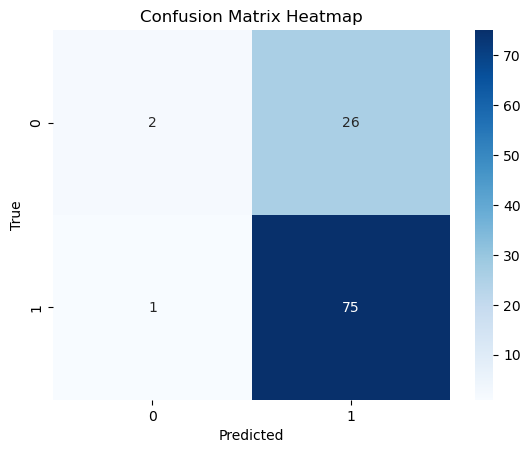

In [40]:
#Confusion Matrix Heatmap
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### The model has difficulties predicting the 'large' class, as indicated by the low number of true positives (correctly predicted 'large' instances) and high number of false negatives (misclassified 'large' instances).
##### the model performs well in predicting the 'small' class, as indicated by the high number of true positives and low number of false negatives for this class.
##### Overall, the model seems to have higher accuracy in predicting the 'small' class compared to the 'large' class.

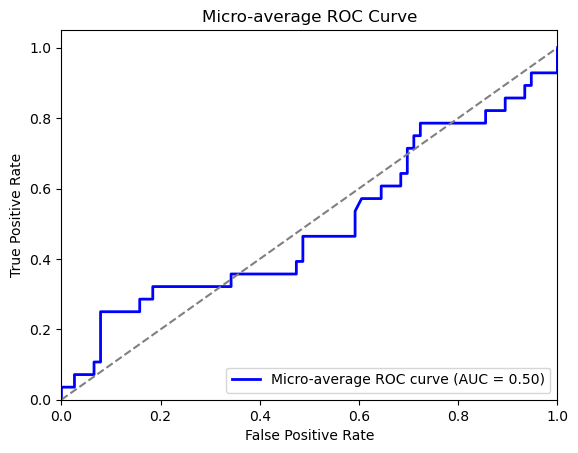

In [44]:
#Micro-average ROC Curve
y_prob = best_svm_model.decision_function(X_test_scaled)  # Use decision_function for SVM
y_binary = label_binarize(y_test, classes=['small', 'large'])
n_classes = y_binary.shape[1]

fpr, tpr, _ = roc_curve(y_binary.ravel(), y_prob.ravel())
roc_auc = roc_auc_score(y_binary, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Micro-average ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc='lower right')
plt.show()


##### With an AUC of 0.50, the model's ability to distinguish between different classes is limited. An AUC of 0.50 indicates that the model's performance is close to random guessing.

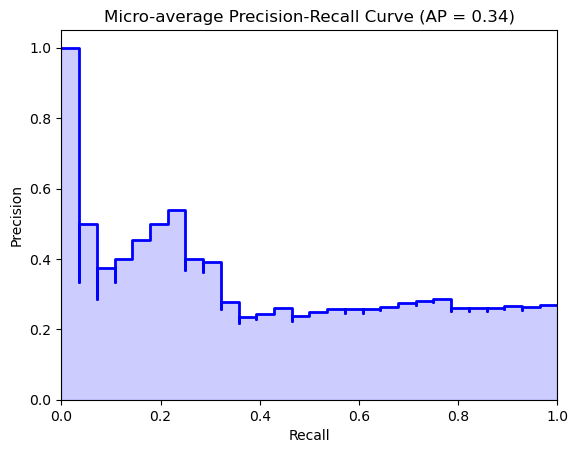

In [45]:
#Micro-average Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_binary.ravel(), y_prob.ravel())
average_precision = average_precision_score(y_binary, y_prob)

plt.figure()
plt.step(recall, precision, color='blue', where='post', lw=2)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Micro-average Precision-Recall Curve (AP = %0.2f)' % average_precision)
plt.show()

##### With an average precision (AP) of 0.34, the model's precision and recall trade-off is relatively low. 

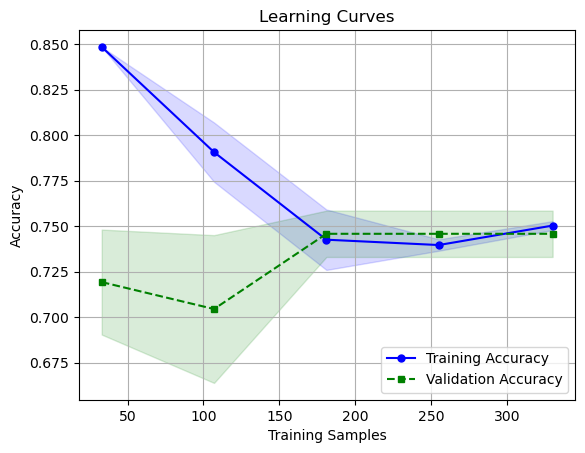

In [47]:
#Learning Curves
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(best_svm_model, X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### The training accuracy starts high and decreases slightly as more data is included, while the validation accuracy increases and stabilizes with more data.